# DV2599 Data exploration for final project
### Simon Lindqvist: siln22@student.bth.se
### Abdalrahman Mohammed: abmm22@student.bth.se

In [1]:
# --------- General Imports --------- #
import numpy as np 
import pandas as pd
import xgboost as xgb # For full gpu training of xgboost (sklearn only supports cpu training)
import sklearn
import seaborn as sns
import scipy as sp
import time
import matplotlib.pyplot as plt

# ------ Specific Imports ------ #
# Sklearn Imports
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# NLP Imports
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# --------- Load Data --------- #
original_movie_df = pd.read_csv('TMDB_movie_dataset_v11.csv') # Load the dataset
movie_df = original_movie_df.copy() # Make a copy of the original dataframe to keep a copy of the original data intact


In [3]:
# Data exploration
movie_df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153441,741350,MotoGP 2019 Review,0.000,0,Released,2019-12-20,0,265,False,NaN,...,MotoGP 2019 Review,The Official Review of the 2019 MotoGP™ World ...,0.600,/wGG0eJ7b88kk5V0SHJYUuTADkUZ.jpg,NaN,Documentary,NaN,NaN,"English, French, Italian, Spanish","season, motor sport, racing, motorcycle, motog..."
1153442,741355,Ghost Crash,0.000,0,Released,2020-09-06,0,2,False,NaN,...,Ghost Crash,11 totally inexplicable car accidents filmed l...,0.600,/3j2lhOdwiP75ZcEg5XvHxy1h7u7.jpg,NaN,NaN,NaN,Italy,NaN,NaN
1153443,741356,Apathie,0.000,0,Released,2017-11-11,0,25,False,NaN,...,Apathie,Four young friends with different life perspec...,0.600,/daPIEY3ZDKVfl6Ca7f5BIVjQZ2K.jpg,NaN,NaN,NaN,NaN,German,NaN
1153444,741357,What Happens Next Will Scare You,0.000,0,Released,2020-10-21,0,72,False,NaN,...,What Happens Next Will Scare You,Staying late in their office on a Friday night...,1.282,/zq1g4MFuWy5nahkSvm8mfnjYsiP.jpg,Your Next Click Might Be Your Last...,"Horror, Comedy",Midnight Crew Studios,United States of America,English,"horror comedy, horror anthology"


In [4]:
# Use info and describe to get a sense of the data types and the distribution of the data
movie_df.info()
movie_df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153446 entries, 0 to 1153445
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1153446 non-null  int64  
 1   title                 1153433 non-null  object 
 2   vote_average          1153446 non-null  float64
 3   vote_count            1153446 non-null  int64  
 4   status                1153446 non-null  object 
 5   release_date          959206 non-null   object 
 6   revenue               1153446 non-null  int64  
 7   runtime               1153446 non-null  int64  
 8   adult                 1153446 non-null  bool   
 9   backdrop_path         304672 non-null   object 
 10  budget                1153446 non-null  int64  
 11  homepage              121844 non-null   object 
 12  imdb_id               606798 non-null   object 
 13  original_language     1153446 non-null  object 
 14  original_title        1153433 non-

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
count,1.153446e+06,1153433,1.153446e+06,1.153446e+06,1153446,959206,1.153446e+06,1.153446e+06,1153446,304672,...,1153433,916952,1.153446e+06,785912,161710,688120,518670,638914,658783,310526
unique,NaN,988629,NaN,NaN,6,42798,NaN,NaN,2,302113,...,1022674,890857,NaN,781329,155404,13418,207747,10118,7086,178151
top,NaN,Home,NaN,NaN,Released,2006-01-01,NaN,NaN,False,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,...,Untitled,,NaN,/sRs2R6qI9C3Liv3hWrQTdmoSqqp.jpg,English,Documentary,Evil Angel,United States of America,English,short film
freq,NaN,159,NaN,NaN,1126265,3599,NaN,NaN,1045511,157,...,108,1137,NaN,54,224,136599,2933,179526,235474,10405
mean,7.502365e+05,NaN,1.856054e+00,1.859595e+01,NaN,NaN,6.913875e+05,4.749131e+01,NaN,NaN,...,NaN,NaN,1.223936e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.008120e+05,NaN,3.010787e+00,3.161895e+02,NaN,NaN,1.854524e+07,6.163141e+01,NaN,NaN,...,NaN,NaN,7.532428e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,-1.200000e+01,-2.800000e+01,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.159352e+05,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,...,NaN,NaN,6.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.556845e+05,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,2.200000e+01,NaN,NaN,...,NaN,NaN,6.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.106794e+06,NaN,4.600000e+00,1.000000e+00,NaN,NaN,0.000000e+00,8.800000e+01,NaN,NaN,...,NaN,NaN,8.750000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Calculate percent of missing values in each column
missing_values = movie_df.isnull().mean() * 100

# Print the percentage of missing values in each column
print(missing_values)

id                       0.000000
title                    0.001127
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date            16.839973
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
backdrop_path           73.585933
budget                   0.000000
homepage                89.436523
imdb_id                 47.392596
original_language        0.000000
original_title           0.001127
overview                20.503257
popularity               0.000000
poster_path             31.863997
tagline                 85.980271
genres                  40.342244
production_companies    55.033005
production_countries    44.608243
spoken_languages        42.885666
keywords                73.078410
dtype: float64


In [6]:
# Drop all unnecessary columns right away. Many of these columns have missing values which causes us to drop too many rows which are otherwise useful

# Drop movies which are not released yet
movie_df.drop(movie_df[movie_df['status'] != 'Released'].index, inplace = True)
movie_df.drop(columns = ['status'], inplace = True)

# Drop all url columns since they are not useful for our analysis
movie_df.drop(columns = ['backdrop_path', 'homepage', 'poster_path'], inplace = True)

# Drop both ID columns since we cannot use them (they are unique for each movie)
movie_df.drop(columns = ['id', 'imdb_id'], inplace = True)

# Drop vote count and popularity since they are unobtainable before the movie is released. Also drop movies with 0 vote count since we cannot trust their scores
movie_df.drop(movie_df[movie_df['vote_count'] == 0].index, inplace = True)
movie_df.drop(columns = ['vote_count', 'popularity'], inplace = True)


In [7]:
# Drop rows with missing values
movie_df = movie_df.dropna()

# Print the number of rows and columns in the dataset remaining after all drops
print(movie_df.shape)

(45337, 16)


In [8]:
# Explore the object columns
movie_df.select_dtypes(include = 'object').nunique()


title                   42302
release_date            19825
original_language         100
original_title          42935
overview                45323
tagline                 44925
genres                   4759
production_companies    31499
production_countries     2150
spoken_languages         1983
keywords                40033
dtype: int64

In [9]:
# Drop tagline and overview since they are out of scope for this project
movie_df.drop(columns = ['tagline', 'overview'], inplace = True)

C:\Users\Simon\AppData\Local\Temp\ipykernel_19184\2416071718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.drop(columns = ['tagline', 'overview'], inplace = True)


C:\Users\Simon\AppData\Local\Temp\ipykernel_19184\806107277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])


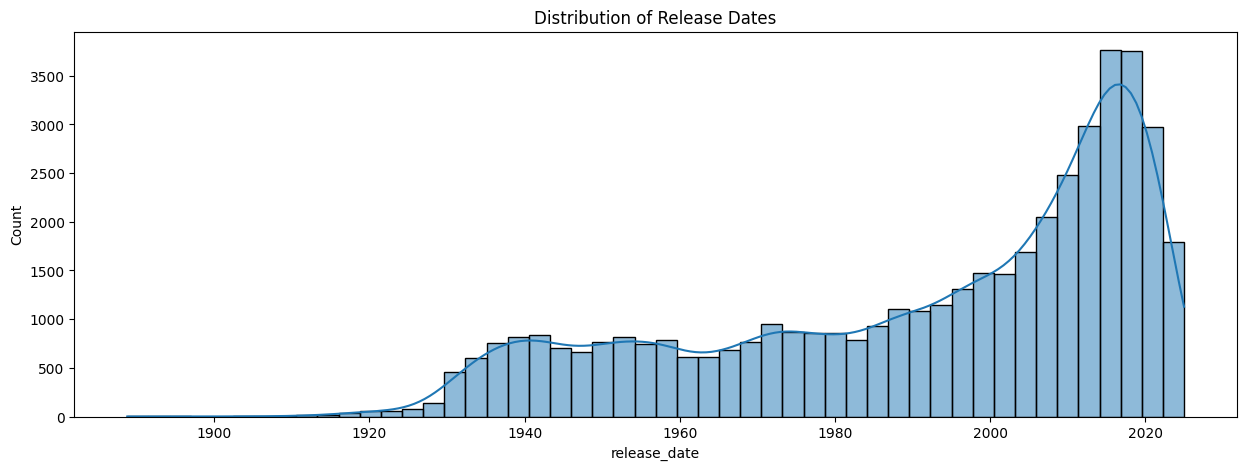

In [10]:
# Explore release date column
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Plot distribution of release dates
plt.figure(figsize = (15, 5))
sns.histplot(movie_df['release_date'], bins = 50, kde = True)
plt.title('Distribution of Release Dates')
plt.show()

In [11]:
# Explore how many titles are the original title
title_same_as_original = movie_df[movie_df['title'] == movie_df['original_title']]
delta = movie_df.shape[0] - title_same_as_original.shape[0]
print(f'There are {delta} titles that are different from the original title. This is {delta/movie_df.shape[0]*100:.2f}% of the data')

# Maybe we can drop original title as it is not very informative and instead feature engineer a column that tells us if the title is the same as the original title?

There are 7673 titles that are different from the original title. This is 16.92% of the data


original_language
en    36125
es     1122
ja     1102
fr      945
it      896
      ...  
yi        1
cy        1
kk        1
tn        1
mn        1
Name: count, Length: 100, dtype: int64


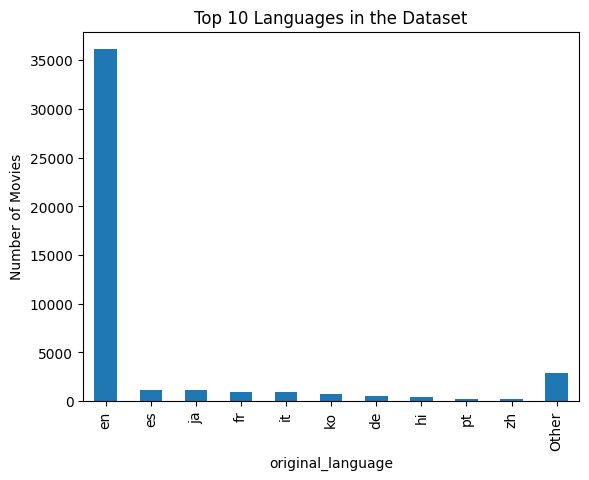

In [12]:
# Explore language column
print(movie_df['original_language'].value_counts())

# Plot the top 10 languages
language_counts = movie_df['original_language'].value_counts()
top_10_languages = language_counts.head(10)
other_languages = language_counts[10:].sum()
top_10_languages['Other'] = other_languages
top_10_languages.plot(kind = 'bar')
plt.title('Top 10 Languages in the Dataset')
plt.ylabel('Number of Movies')
plt.show()

Unsurpriinsgly english is dominating for the vast majority of movies.

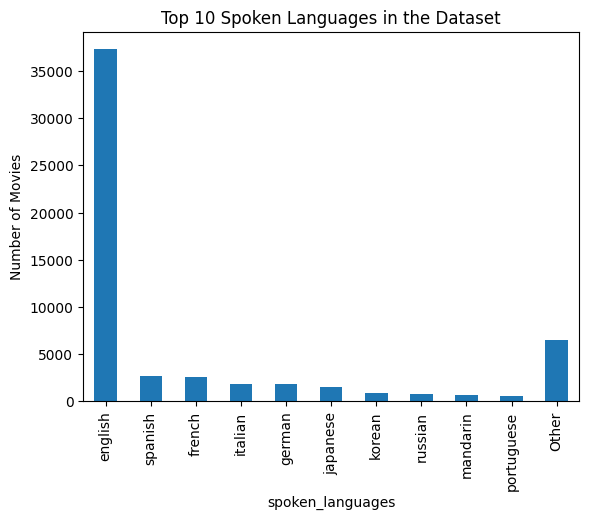

In [13]:
# Explore spoken languages column
# print(movie_df['spoken_languages'].value_counts())

# Plot top 10 spoken languages and other 
temp_df = movie_df['spoken_languages'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
spoken_language_counts = temp_df.value_counts()
top_10_languages = spoken_language_counts.head(10)
other_languages = spoken_language_counts[10:].sum()
top_10_languages['Other'] = other_languages
top_10_languages.plot(kind = 'bar')
plt.title('Top 10 Spoken Languages in the Dataset')
plt.ylabel('Number of Movies')
plt.show()


Unsurpriinsgly english is dominating for the vast majority of movies.

genres
Drama                                         3721
Comedy                                        2587
Documentary                                   2309
Horror                                        1610
Drama, Romance                                1259
                                              ... 
Fantasy, Science Fiction, Comedy                 1
Adventure, Music, Romance                        1
Fantasy, Romance, Family, Comedy                 1
Horror, Drama, Thriller, Fantasy                 1
Mystery, Drama, History, Thriller, Fantasy       1
Name: count, Length: 4759, dtype: int64


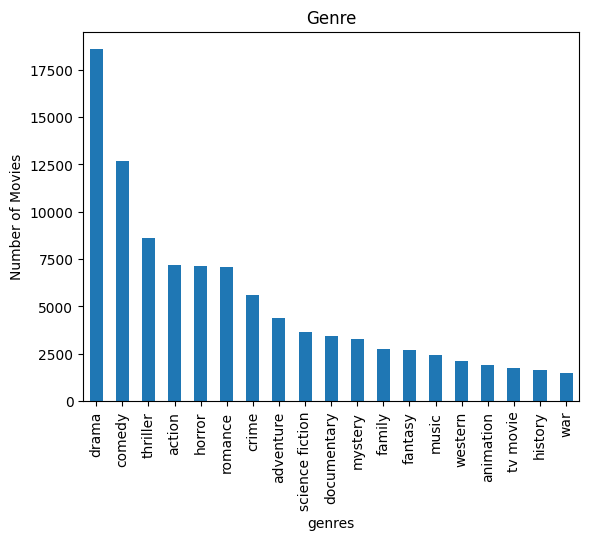

In [14]:
# Explore genres column
print(movie_df['genres'].value_counts())

# Count and plot number of movies per genre. Plot all genres
temp_df = movie_df['genres'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
genre_counts = temp_df.value_counts()
genre_counts.plot(kind = 'bar')
plt.title('Genre')
plt.ylabel('Number of Movies')
plt.show()


Not too fragmented so this is a easily one hot encoded feature for all scenarios (which is good since we are handling combinations of genres, making one hot encoding or vectorization useful for showing complex relationsships between these).

production_companies
Metro-Goldwyn-Mayer                                                                      1005
Paramount                                                                                 713
Warner Bros. Pictures                                                                     701
Columbia Pictures                                                                         656
20th Century Fox                                                                          631
                                                                                         ... 
Pacific Western, HBO Films, HBO                                                             1
Fireside Film                                                                               1
Filmkompaniet MadMonkey, Handmade films in Norwegian Woods, Yesbox Productions              1
Tritone Cinematografica, Atlántida Films, Terra-Filmkunst                                   1
Schiller Productions Inc., 20th Century

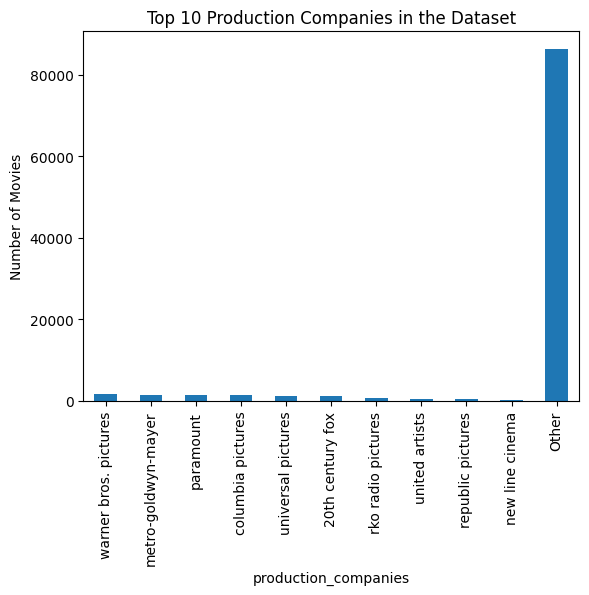

In [15]:
# Explore production companies column
print(movie_df['production_companies'].value_counts())

# Plot count of production companies to see if there are any companies that are very common. Use top 10 companies and other category
temp_df = movie_df['production_companies'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
company_counts = temp_df.value_counts()
top_10_companies = company_counts.head(10)
other_companies = company_counts[10:].sum()
top_10_companies['Other'] = other_companies
top_10_companies.plot(kind = 'bar')
plt.title('Top 10 Production Companies in the Dataset')
plt.ylabel('Number of Movies')
plt.show()


Highly fragmented and very long tailed after the intial ones.

production_countries
United States of America                                                                  25456
United Kingdom                                                                             2945
Japan                                                                                      1057
Canada                                                                                      993
India                                                                                       785
                                                                                          ...  
Belgium, France, Japan, United Kingdom                                                        1
Austria, Greece, Hungary, India, New Zealand, Poland, Turkey, United States of America        1
United States of America, France, United Kingdom                                              1
Germany, Belgium, United Kingdom, Netherlands                                                 1
Germany, United Sta

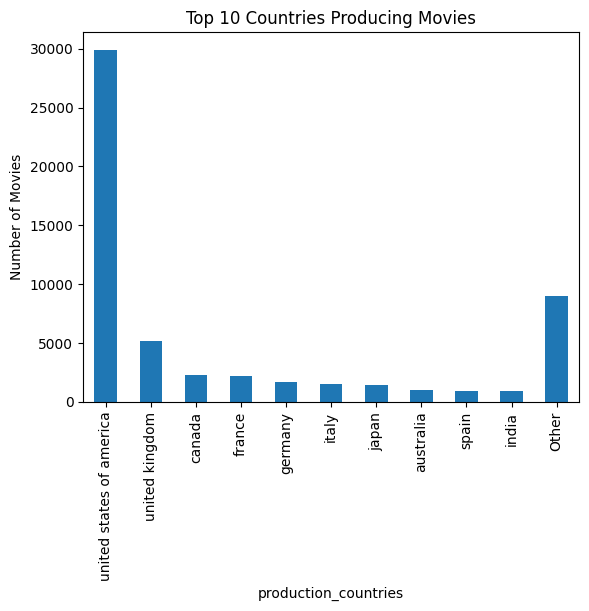

In [16]:
# Explore production countries column
print(movie_df['production_countries'].value_counts())

# Count how many movies are produced in each country and plot the top 10 (with the rest as 'Other')
temp_df = movie_df['production_countries'].str.split(',').explode()
# Apply strip to remove whitespace, and apply lower to make the country names lowercase
temp_df = temp_df.str.strip().str.lower()
country_counts = temp_df.value_counts()
top_10_countries = country_counts.head(10)
other_countries = country_counts[10:].sum()
top_10_countries['Other'] = other_countries
top_10_countries.plot(kind = 'bar')
plt.title('Top 10 Countries Producing Movies')
plt.ylabel('Number of Movies')
plt.show()


Unsurprisingly english speaking countries dominate

keywords
woman director                                                                          439
short film                                                                              155
musical                                                                                 135
christmas                                                                               109
philippines                                                                              95
                                                                                       ... 
high school, vampire, school, high school student, teenager, tv movie                     1
military officer, corpse, american, roadblock                                             1
chaos, department store, slapstick comedy, romance                                        1
infidelity, tennis player, longing, one-night stand, relationship, private detective      1
professor, musical, press agent                                        

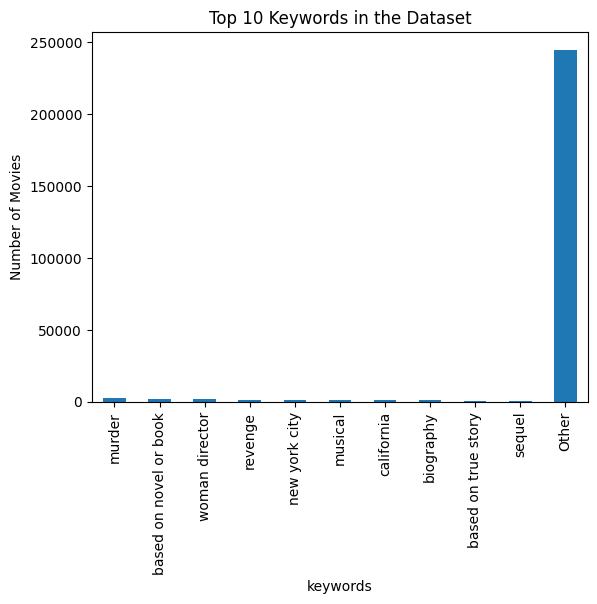

In [17]:
# Explore keywords column
print(movie_df['keywords'].value_counts())

# Plot top 10 keywords and other category
temp_df = movie_df['keywords'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
keyword_counts = temp_df.value_counts()
top_10_keywords = keyword_counts.head(10)
top_100_keywords = keyword_counts.head(100)
other_keywords = keyword_counts[10:].sum()
top_10_keywords['Other'] = other_keywords
top_10_keywords.plot(kind = 'bar')
plt.title('Top 10 Keywords in the Dataset')
plt.ylabel('Number of Movies')
plt.show()


Since keywords are very long tailed distribution picking an arbitrary number of top 10 or top 100 when needed the most important keywords in for example one hot encoding might give a better indication than taking a percentage of lets say 10% since so many will be so similar in count.

In [18]:
# Explore non object columns
movie_df.select_dtypes(exclude = 'object').nunique()

vote_average     4340
release_date    19825
revenue          8912
runtime           311
adult               2
budget           1736
dtype: int64

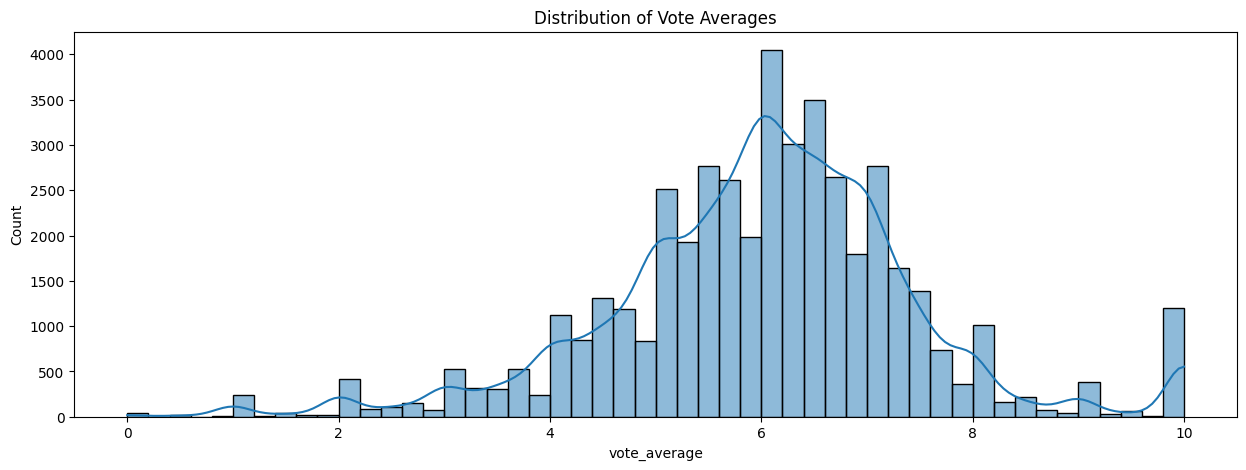

In [19]:
# Explore vote average column (target variable)
plt.figure(figsize = (15, 5))
sns.histplot(movie_df['vote_average'], bins = 50, kde = True)
plt.title('Distribution of Vote Averages')
plt.show()


Possible feature engineering:
  * This is rougly a normal distribution. We can use this to create a binary target variable for classification. We can use the median as the threshold
  * We can also use this to create a multi-class target variable for classification. We can use the quartiles as thresholds to get 4 classes
  * We could also use this as a regression target variable (but not for this project since its a classification task)

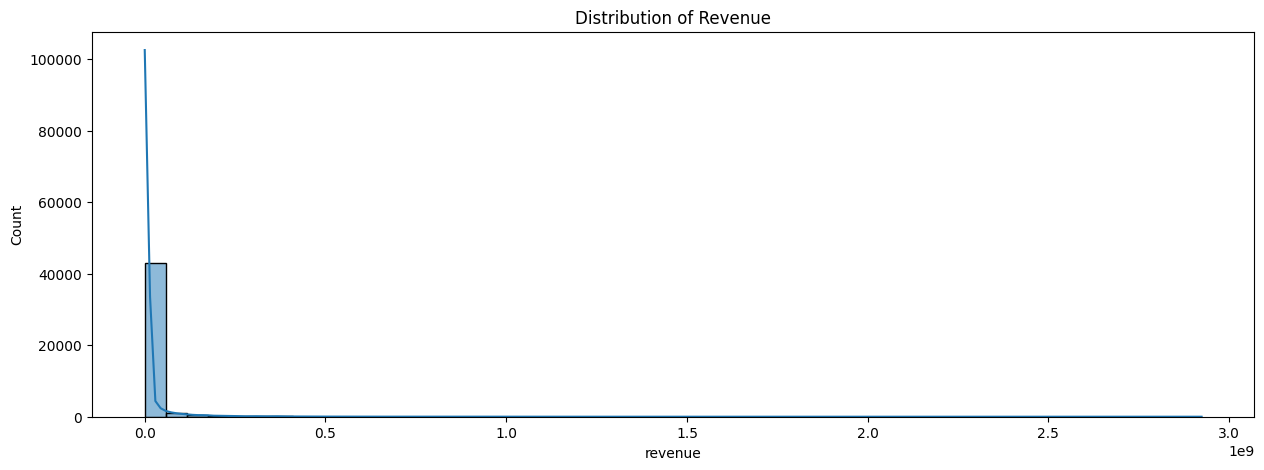

In [20]:
# Revenue column exploration (target variable)
plt.figure(figsize = (15, 5))
sns.histplot(movie_df['revenue'], bins = 50, kde = True)
plt.title('Distribution of Revenue')
plt.show()


Seems to be higly skewed towards very low revenue. Likely due to large amount of amateur movies, unreleased movies and movies with missing revenue data (but reported as 0 so its not technically missing)

Possible feature engineering: 
  * Create a binary target variable for classification. Use the median as the threshold
  * Create a multi-class target variable for classification. Use the quartiles as thresholds to get 4 classes
  * Could use this as a regression target variable (but not for this project)
  * Could also combine with budget to create a profit column (probably be a binary for profitable or not profitable)

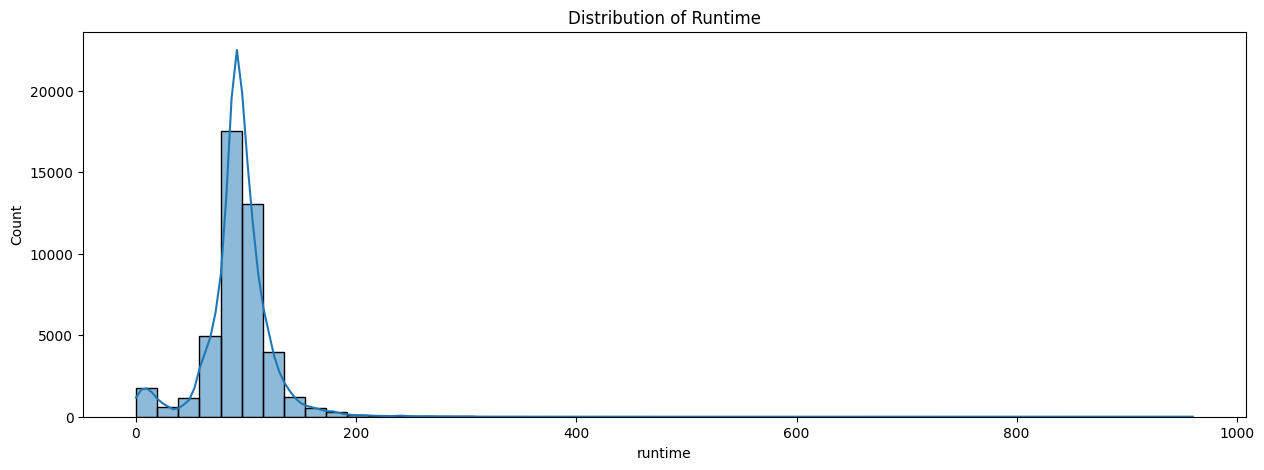

In [21]:
# Runtime column exploration
plt.figure(figsize = (15, 5))
sns.histplot(movie_df['runtime'], bins = 50, kde = True)
plt.title('Distribution of Runtime')
plt.show()

Seems to be roughly normally distributed except a bump at 0.

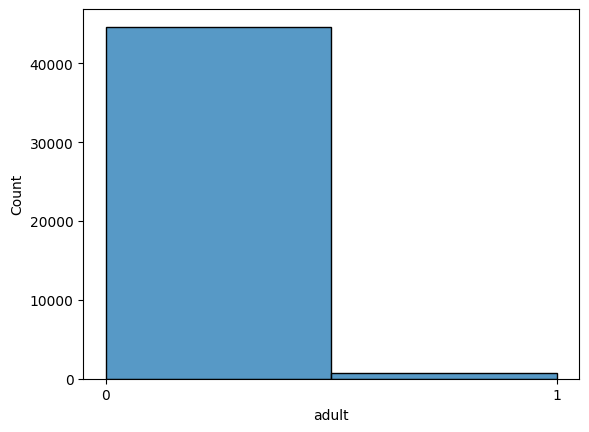

In [22]:
# Adult column exploration
sns.histplot(x=movie_df['adult'], bins=2)
plt.xticks([0, 1]);

This is a binary column. We will not change it. It is however unsurprisingly HEAVILY skewed towards non-adult movies

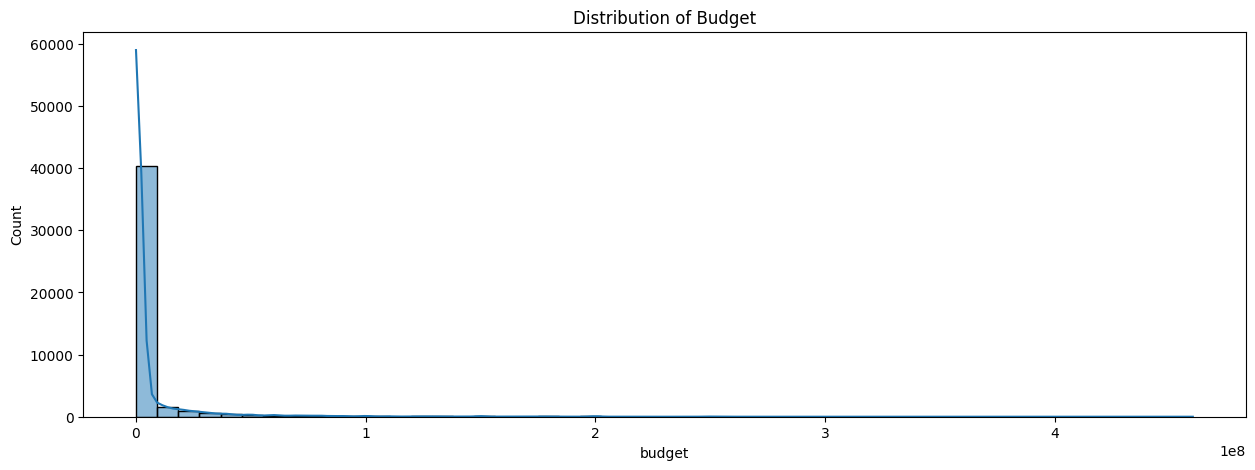

The correlation between budget and revenue is 0.77


In [23]:
# Budget column exploration
plt.figure(figsize = (15, 5))
sns.histplot(movie_df['budget'], bins = 50, kde = True)
plt.title('Distribution of Budget')
plt.show()

# This is highly skewed towards very low budget movies. Rougly similar plot to revenue. (maybe higher budget movies are more likely to be profitable?)

# Determine budget and revenue correlation
correlation = movie_df['budget'].corr(movie_df['revenue'])
print(f'The correlation between budget and revenue is {correlation:.2f}')


77 % correlation between budget and revenue. This is a quite strong correlation. This means a profitability column might not be a bad idea.

In [24]:
# Check if the spoken language or language often the same as production country?
# Is rows with spoken language "English" often produced in United States of America or United Kingdom?
# Is rows with spoken language "French" often produced in France?
# Is rows with spoken language "German" often produced in Germany?
# Is rows with spoken language "Spanish" often produced in Spain?
# Calculate it
spoken_language = movie_df['spoken_languages'].str.split(',').explode().str.strip().str.lower()
production_country = movie_df['production_countries'].str.split(',').explode().str.strip().str.lower()

total = 0
for row in movie_df.iterrows():
    spoken_language = row[1]['spoken_languages'].split(',')[0].strip().lower()
    production_country = row[1]['production_countries'].split(',')[0].strip().lower()
    if spoken_language in production_country:
        total += 1

    # English speaking countries
    if spoken_language == 'english' and production_country in ['united states of america', 'united kingdom', 'canada', 'australia', 'new zealand']:
        total += 1
        # Continue to next iteration to avoid double counting
        continue

    # French speaking countries not including France
    if spoken_language == 'french' and production_country in ['france', 'belgium', 'canada', 'switzerland', 'luxembourg']:
        total += 1
        continue

    # Chinese speaking countries
    if spoken_language == 'chinese' and production_country in ['china', 'hong kong', 'taiwan', 'singapore']:
        total += 1
        continue

    # Spanish speaking countries not including Spain
    if spoken_language == 'spanish' and production_country in ['spain', 'mexico', 'argentina', 'colombia']:
        total += 1
        continue

    # Is it english in a non english speaking country? (international movies)
    if spoken_language == 'english' and production_country not in ['united states of america', 'united kingdom', 'canada', 'australia', 'new zealand']:
        total += 1
        continue

print(f'The spoken language and production country are the same in {total} out of {movie_df.shape[0]} rows. This is {total/movie_df.shape[0]*100:.2f}% of the data')


The spoken language and production country are the same in 36901 out of 45337 rows. This is 81.39% of the data


It seems like most of the time spoken language and production country are the same. This is unsuprising since most movies are made for domestic audiences 
or for international markets, where english dominates. This means we can drop either column to reduce dimensionality in our one hot encoded data. 
We think it is better to drop production country since spoken language is slightly more informative for performance based on that this enables the movie to be sold
internationally. whereas the production country might not indicate this.

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
one_hot_df = movie_df.copy()

# Drop production countries since we determined spoken languages are more informative
one_hot_df.drop(columns=['production_countries'], inplace=True)

# Process each column to create lists of values
columns_to_encode = ['genres', 'production_companies', 'spoken_languages', 'keywords']
for col in columns_to_encode:
    one_hot_df[col] = one_hot_df[col].apply(lambda x: x.split(',') if isinstance(x, str) else [])
    one_hot_df[col] = one_hot_df[col].apply(lambda x: [i.strip().lower() for i in x])

# Create a fresh DataFrame to hold all our one-hot encoded data
encoded_df = pd.DataFrame(index=one_hot_df.index)

# Add all non-encoded columns first (except ones we'll drop)
text_cols_to_drop = ['title', 'original_title', 'overview', 'tagline', 
                    'genres', 'production_companies', 'spoken_languages', 'keywords']
for col in one_hot_df.columns:
    if col not in text_cols_to_drop:
        encoded_df[col] = one_hot_df[col]

# One hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(one_hot_df['genres'])
genres_cols = [f'genre_{g}' for g in mlb.classes_]  # Add prefix to avoid collisions
for i, col in enumerate(genres_cols):
    encoded_df[col] = genres_encoded[:, i]

# One hot encode production companies (top 100)
companies_encoded = mlb.fit_transform(one_hot_df['production_companies'])
companies_df = pd.DataFrame(companies_encoded, columns=mlb.classes_, index=one_hot_df.index)
top_100_companies = companies_df.sum().sort_values(ascending=False).head(100).index
companies_cols = [f'company_{c}' for c in top_100_companies]  # Add prefix
for i, company in enumerate(top_100_companies):
    encoded_df[f'company_{company}'] = companies_df[company]

# One hot encode spoken languages
languages_encoded = mlb.fit_transform(one_hot_df['spoken_languages'])
languages_cols = [f'lang_{l}' for l in mlb.classes_]  # Add prefix
for i, col in enumerate(languages_cols):
    encoded_df[col] = languages_encoded[:, i]

# One hot encode keywords (top 100)
keywords_encoded = mlb.fit_transform(one_hot_df['keywords'])
keywords_df = pd.DataFrame(keywords_encoded, columns=mlb.classes_, index=one_hot_df.index)
top_100_keywords = keywords_df.sum().sort_values(ascending=False).head(100).index
for keyword in top_100_keywords:
    encoded_df[f'keyword_{keyword}'] = keywords_df[keyword]

# One-hot encode 'original_language' (categorical with limited values)
if 'original_language' in encoded_df.columns:
    lang_dummies = pd.get_dummies(encoded_df['original_language'], prefix='orig_lang')
    for col in lang_dummies.columns:
        encoded_df[col] = lang_dummies[col]
    encoded_df.drop(columns=['original_language'], inplace=True)

# Replace the original DataFrame with our clean encoded DataFrame
one_hot_df = encoded_df


C:\Users\Simon\AppData\Local\Temp\ipykernel_19184\1138447646.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_df[f'company_{company}'] = companies_df[company]
C:\Users\Simon\AppData\Local\Temp\ipykernel_19184\1138447646.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_df[f'company_{company}'] = companies_df[company]
C:\Users\Simon\AppData\Local\Temp\ipykernel_19184\1138447646.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [26]:
# Feature engineered dataset
feature_engineered_df = movie_df.copy()

# Feature engineer all multi category columns
# Drop production countries since we have determined that spoken languages are more informative and this reduces dimensionality (see above)
feature_engineered_df.drop(columns = ['production_countries'], inplace = True)

# -- Feature engineer all multi category columns -- #
# Genres
# For genres we will create a column for each genre and set it to 1 if the movie has that genre and 0 otherwise 
# (this is one hot encoding, but we will only do this for genres since it is a limited set of categories, individual genres should
# have a strong identifying power for the movie and combinations of genres should be informative)
temp_df = movie_df['genres'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
for genre in temp_df.unique():
    feature_engineered_df[genre] = feature_engineered_df['genres'].apply(lambda x: genre in x)

# Production companies
# There are too many production companies to do one hot encoding, so we will create a binary column that is true
# if the production company meets some arbitrary threshold of movies produced, thus indicating that it is a major production company.
# We will set the threshold to 10 movies produced and/or a total budget of 100 million dollars between all movies produced by this company.
major_production_companies_by_movie_count = movie_df['production_companies'].str.split(',').explode().str.strip().str.lower().value_counts()
major_production_companies_by_budget = movie_df.groupby('production_companies')['budget'].sum()
major_production_companies = major_production_companies_by_movie_count[major_production_companies_by_movie_count >= 10].index
major_production_companies = major_production_companies.union(major_production_companies_by_budget[major_production_companies_by_budget >= 100000000].index)
feature_engineered_df['has_major_company'] = feature_engineered_df['production_companies'].apply(
    lambda x: any(company in x.lower() for company in major_production_companies)
)

# Spoken languages
# Since english is the most spoken language in movies by far we will simply create a binary column for english spoken movies
feature_engineered_df['spoken_english'] = feature_engineered_df['spoken_languages'].apply(lambda x: 'english' in x)

# Original language
# Since english is the most spoken language in movies by far we will yet again create a binary column for original language being english
feature_engineered_df['original_language_english'] = feature_engineered_df['original_language'].apply(lambda x: x == 'en')

# Keywords
# Create a single binary column indicating if the movie has any of the top 100 keywords
temp_df = movie_df['keywords'].str.split(',').explode()
temp_df = temp_df.str.strip().str.lower()
keyword_counts = temp_df.value_counts()
top_100_keywords = keyword_counts.head(100).index

# Create a single binary column
feature_engineered_df['has_popular_keyword'] = feature_engineered_df['keywords'].apply(
    lambda x: any(keyword in x.lower() for keyword in top_100_keywords)
)

# Drop the original multi-category columns
feature_engineered_df.drop(columns=['genres', 'production_companies', 'spoken_languages', 'keywords', 'original_language'], inplace=True)

# Drop unnecessary columns
feature_engineered_df.drop(columns=['title', 'original_title'], inplace=True)


In [27]:
# --- Data Preprocessing and feature engineering for non target variables in the datasets --- #
# StandardScaler for roguly normally distributed columns and MinMaxScaler for highly skewed columns
# Standard scale: release_date, runtime
# MinMax scale: budget
# No scaling: adult (already binary)

# Scale one hot encoded dataset
one_hot_df['release_date'] = StandardScaler().fit_transform(one_hot_df['release_date'].values.reshape(-1, 1))
one_hot_df['runtime'] = StandardScaler().fit_transform(one_hot_df['runtime'].values.reshape(-1, 1))
one_hot_df['budget'] = MinMaxScaler().fit_transform(one_hot_df['budget'].values.reshape(-1, 1))

# Scale feature engineered dataset
feature_engineered_df['release_date'] = StandardScaler().fit_transform(feature_engineered_df['release_date'].values.reshape(-1, 1))
feature_engineered_df['runtime'] = StandardScaler().fit_transform(feature_engineered_df['runtime'].values.reshape(-1, 1))
feature_engineered_df['budget'] = MinMaxScaler().fit_transform(feature_engineered_df['budget'].values.reshape(-1, 1))


In [28]:
# --- Lets create all the target variables we discussed above --- #
# Classification target variables
rounded_vote_average = movie_df['vote_average'].round().astype(int)
binary_vote_average = movie_df['vote_average'] > movie_df['vote_average'].median()
quartile_vote_average = pd.qcut(movie_df['vote_average'], q = 4, labels = False)

binary_revenue = movie_df['revenue'] > movie_df['revenue'].median()
profitable = movie_df['revenue'] > movie_df['budget'] # This is the binary profitability column dicussed above

# Put them in two dicts for easy access
classification_targets_normal = {'rounded_vote_average': rounded_vote_average, 'binary_vote_average': binary_vote_average, 'quartile_vote_average': quartile_vote_average, 'binary_revenue': binary_revenue, 'profitable': profitable}


In [29]:
# Using k-fold cross validation to evaluate the datasets
# We will use xgboost for this since it can handle high dimensionality data well

# Initialize results dictionaries
classification_results = {}

# Prepare datasets - make sure to drop target columns
datasets = {
    'one_hot': one_hot_df.drop(columns=['vote_average', 'revenue'], errors='ignore'),
    'feature_engineered': feature_engineered_df.drop(columns=['vote_average', 'revenue'], errors='ignore')
}

# Print dataset dimensions for context
for name, df in datasets.items():
    print(f"{name} dataset dimensions: {df.shape}")

# Set up k-fold cross validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Loop through datasets
for dataset_name, X in datasets.items():
    # CLASSIFICATION LOOP
    for target_name, y in classification_targets_normal.items():
        # Convert to Series if DataFrame
        if isinstance(y, pd.DataFrame):
            y = y.iloc[:, 0]
            
        # Initialize metrics arrays
        accuracies = []
        f1_scores = []
        training_times = []
        
        # Perform stratified k-fold cross validation
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Create and fit classifier with timing
            clf = xgb.XGBClassifier(n_jobs=-1, eval_metric='logloss')
            
            start_time = time.time()
            clf.fit(X_train, y_train)
            end_time = time.time()
            
            training_time = end_time - start_time
            training_times.append(training_time)
            
            # Make predictions
            y_pred = clf.predict(X_test)
            
            # Calculate metrics
            accuracies.append(accuracy_score(y_test, y_pred))
            
            # Handle multi-class vs binary F1 score
            if len(np.unique(y)) > 2:
                f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
            else:
                f1_scores.append(f1_score(y_test, y_pred))
        
        # Store results with dataset name in the key
        classification_results[f"{dataset_name}_{target_name}"] = {
            'accuracy': np.mean(accuracies), 
            'f1': np.mean(f1_scores),
            'std_accuracy': np.std(accuracies),
            'std_f1': np.std(f1_scores),
            'training_time': np.mean(training_times),
            'std_training_time': np.std(training_times)
        }

# Print summary of classification results
print("\nClassification Results Summary:")
print("=" * 100)
print(f"{'Dataset & Target':<35} | {'Accuracy':<15} | {'F1 Score':<15} | {'Training Time (s)':<20}")
print("-" * 100)
for key, metrics in classification_results.items():
    print(f"{key:<35} | {metrics['accuracy']:.4f} ± {metrics['std_accuracy']:.4f} | {metrics['f1']:.4f} ± {metrics['std_f1']:.4f} | {metrics['training_time']:.3f} ± {metrics['std_training_time']:.3f}")

# Calculate average training time by dataset type
one_hot_times_cls = [metrics['training_time'] for key, metrics in classification_results.items() if key.startswith('one_hot')]
feature_eng_times_cls = [metrics['training_time'] for key, metrics in classification_results.items() if key.startswith('feature_engineered')]

print("\nTraining Time Comparison:")
print("-" * 100)
print(f"One-hot encoding average training time (classification): {np.mean(one_hot_times_cls):.3f} seconds")
print(f"Feature engineered average training time (classification): {np.mean(feature_eng_times_cls):.3f} seconds")
print(f"Speedup factor (classification): {np.mean(one_hot_times_cls)/np.mean(feature_eng_times_cls):.2f}x")

one_hot dataset dimensions: (45337, 467)
feature_engineered dataset dimensions: (45337, 27)

Classification Results Summary:
Dataset & Target                    | Accuracy        | F1 Score        | Training Time (s)   
----------------------------------------------------------------------------------------------------
one_hot_rounded_vote_average        | 0.4092 ± 0.0058 | 0.3671 ± 0.0054 | 5.619 ± 0.162
one_hot_binary_vote_average         | 0.7167 ± 0.0022 | 0.7131 ± 0.0030 | 0.928 ± 0.043
one_hot_quartile_vote_average       | 0.4651 ± 0.0011 | 0.4533 ± 0.0018 | 2.239 ± 0.086
one_hot_binary_revenue              | 0.8975 ± 0.0030 | 0.7467 ± 0.0088 | 0.874 ± 0.019
one_hot_profitable                  | 0.8786 ± 0.0038 | 0.5797 ± 0.0144 | 0.881 ± 0.012
feature_engineered_rounded_vote_average | 0.3717 ± 0.0046 | 0.3228 ± 0.0039 | 1.465 ± 0.010
feature_engineered_binary_vote_average | 0.6676 ± 0.0012 | 0.6562 ± 0.0010 | 0.165 ± 0.002
feature_engineered_quartile_vote_average | 0.4198 ± 0.00

# Movie Performance Prediction: Results Analysis

## Overview

We evaluated two feature representation approaches for predicting various movie performance metrics: one-hot encoding (467 features) versus feature engineering (27 features). Our analysis reveals a clear tradeoff between model performance and computational efficiency.

## Data Representation Comparison

| Approach | Dimensionality | Advantages | Disadvantages |
|----------|---------------|------------|--------------|
| One-hot encoding | 467 features | Higher predictive performance | ~4× longer training times |
| Feature engineering | 27 features | Significantly faster training | Lower predictive performance |

## Classification Performance

### Vote Average Prediction
- **Binary classification** shows strong performance (71.7% accuracy with one-hot encoding)
- One-hot encoding provides a **~5 percentage point advantage** (71.7% vs 66.8%) over feature engineering
- **Rating scale prediction** (rounded_vote_average) remains challenging with both approaches (40.9% vs 37.2%)
- **Quartile prediction** shows moderate performance (46.5% with one-hot vs 42.0% with feature engineering)

### Financial Performance Prediction
- **Binary revenue classification** achieves the highest accuracy overall (89.8% with one-hot)
- Feature engineering maintains strong performance for revenue prediction (89.1%, only 0.7 percentage points lower)
- **Profitability prediction** shows high accuracy (87.9% one-hot, 86.6% feature-engineered) but lower F1 scores (58.0%, 53.5%), indicating class imbalance
- Financial metrics are more predictable than quality metrics across all models

## Training Time Analysis
- Feature engineering offers a **3.87× speedup** for classification tasks
- The most complex task (rounded_vote_average classification) shows the largest timing difference (5.4s vs 1.5s)
- Binary classification tasks show the smallest absolute time difference but largest relative speedup (~5.5×)

## Conclusion

1. **For production environments with time constraints:**
   - Feature-engineered approach offers substantial speedup with reasonable performance
   - Especially effective for binary revenue and profitable classification (less than 1.3 percentage point accuracy loss)

2. **For maximum predictive performance:**
   - One-hot encoding provides consistently better results across all metrics
   - The performance gap is largest for quality metrics (vote average predictions)

3. **Most promising prediction targets:**
   - Binary revenue classification (89.8% accuracy)
   - Binary vote average (71.7% accuracy)
   
4. **On profitable:**
   - Even though not as good as binary revenue, it is more important to determining a movies success so it will also be used

This analysis demonstrates that while preserving categorical information through one-hot encoding improves prediction quality, the higher dimensionality comes with significant computational costs. The feature engineered dataset provides a compelling alternative for binary revenue and profitable classification, where it maintains competitive performance while reducing training time by nearly 4×.

In the main notebook, we will thus use the one-hot encoded dataset but also include the feature engineered dataset for binary revenue and profitable classifications to benefit from the significant training complexity reduction with minimal performance impact.